In [3]:
import boto3
import pandas as pd
import numpy as np

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'danhtran358-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
## Dropping No and transction_date
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
from sklearn.model_selection import train_test_split

## Splitting the data
train, test = train_test_split(house_price, test_size = 0.2)

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
269,17.6,837.7233,0,24.96334,121.54767,23.0
337,31.3,600.8604,5,24.96871,121.54651,30.9
17,17.7,350.8515,1,24.97544,121.53119,37.4
233,39.7,333.3679,9,24.98016,121.53932,32.4
33,16.5,323.6550,6,24.97841,121.54281,49.3


In [32]:
## Defining the input and target variables
X_train = train.drop(columns = ['house_price_of_unit_area'], axis = 1)
Y_train = train['house_price_of_unit_area']
X_test = test.drop(columns = ['house_price_of_unit_area'], axis = 1)
Y_test = test['house_price_of_unit_area']

## Building the linear model
from sklearn.linear_model import LinearRegression

lm_md1 = LinearRegression().fit(X_train, Y_train)

## Predicting on test
preds = lm_md1.predict(X_test)

## Computing the mse
mse_md1 = np.mean(np.power(preds - Y_test, 2))
mse_md1

91.451622418761

In [28]:
## Defining the input and target variables
X_train = train.drop(columns = ['distance_to_the_nearest_MRT_station', 'house_price_of_unit_area'], axis = 1)
Y_train = train['house_price_of_unit_area']
X_test = test.drop(columns = ['distance_to_the_nearest_MRT_station', 'house_price_of_unit_area'], axis = 1)
Y_test = test['house_price_of_unit_area']

## Building the linear model
lm_md1 = LinearRegression().fit(X_train, Y_train)

## Predicting on test
preds = lm_md1.predict(X_test)

## Computing the mse
mse_md2 = np.mean(np.power(preds - Y_test, 2))
mse_md2

92.11842381479995

In [22]:
## This problem has a small number of variables, so computation is not a big problem
## Because the first model has smaller MSE, I would choose to use it.

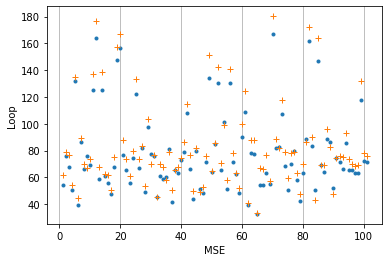

In [62]:
result_md1 = list()
result_md1.append(mse_md1)
result_md2 = list()
result_md2.append(mse_md2)

for i in range(100):
    
    ## Splitting the data
    train, test = train_test_split(house_price, test_size = 0.2)
    
    ## Working on model 1
    ## Defining the input and target variables
    X_train = train.drop(columns = ['house_price_of_unit_area'], axis = 1)
    Y_train = train['house_price_of_unit_area']
    X_test = test.drop(columns = ['house_price_of_unit_area'], axis = 1)
    Y_test = test['house_price_of_unit_area']

    ## Building the linear model
    from sklearn.linear_model import LinearRegression

    lm_md1 = LinearRegression().fit(X_train, Y_train)

    ## Predicting on test
    preds = lm_md1.predict(X_test)

    ## Computing the mse
    mse_md1 = np.mean(np.power(preds - Y_test, 2))

    ## Store mse model 1
    result_md1.append(mse_md1)
    
    ## Working on model 2
    ## Defining the input and target variables
    X_train = train.drop(columns = ['distance_to_the_nearest_MRT_station', 'house_price_of_unit_area'], axis = 1)
    Y_train = train['house_price_of_unit_area']
    X_test = test.drop(columns = ['distance_to_the_nearest_MRT_station', 'house_price_of_unit_area'], axis = 1)
    Y_test = test['house_price_of_unit_area']

    ## Building the linear model
    lm_md1 = LinearRegression().fit(X_train, Y_train)

    ## Predicting on test
    preds = lm_md1.predict(X_test)

    ## Computing the mse
    mse_md2 = np.mean(np.power(preds - Y_test, 2))
    
    ## Store mse model 2
    result_md2.append(mse_md2)

import matplotlib.pyplot as plt
x = [i for i in range(1, 102)]

plt.plot(x, result_md1, '.')
plt.plot(x, result_md2, '+')
plt.xlabel('MSE')
plt.ylabel('Loop')
plt.grid(axis='x')

plt.show()

## Overall model 1 (dot) is performing better model 2 (+ sign) with smaller MSE in most tests